Including necessary libraries:

In [3]:
import pandas as pd
import numpy as np
from IPython.display import display
import visuals as vs

%matplotlib inline

## Loading the Dataset:

In [4]:
data = pd.read_csv('titanic_data.csv')

## Exploring the Dataset:

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.shape

(891, 12)

In [7]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
survived = data['Survived']
df = data.drop('Survived', axis=1)
display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Defining the Accuracy Score:

In [13]:
def accuracy_score(truth, pred):
    if len(truth) == len(pred):
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    else:
        return "Number of predictions does not match the number of outcomes"
predictions = pd.Series(np.ones(5, dtype = int))
print(accuracy_score(survived[:5], predictions))

Predictions have an accuracy of 60.00%.


## Making Predictions:

In [43]:
def predictions_0(df):
    predictions = []
    for _, passenger in df.iterrows():
        predictions.append(0)
    return pd.Series(predictions)
predictions = predictions_0(data)

In [44]:
print(accuracy_score(survived, predictions))

Predictions have an accuracy of 61.62%.


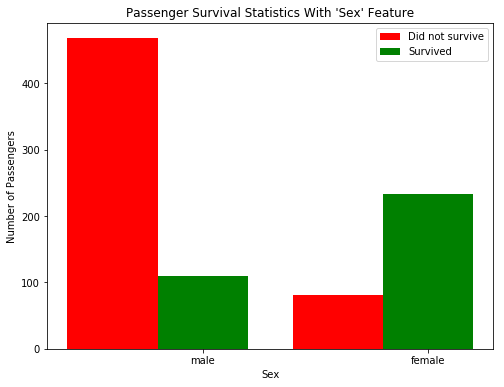

In [45]:
vs.survival_stats(df, survived, 'Sex')

In [49]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in df.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        predictions.append(int(passenger['Sex']=='female'))
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)

In [50]:
print(accuracy_score(survived, predictions))

Predictions have an accuracy of 78.68%.


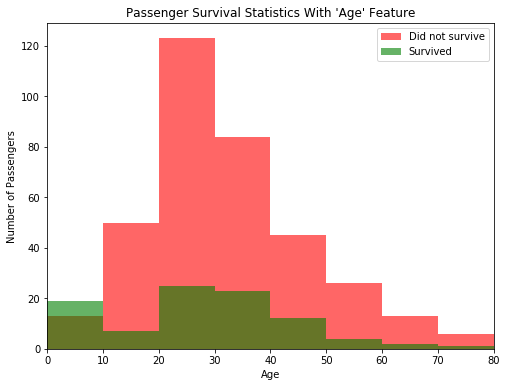

In [51]:
"""Using just the Sex feature for each passenger"""
vs.survival_stats(df, survived, 'Age', ["Sex == 'male'"])

In [65]:
def predictions_2(df):
    predictions = []
    for _, passenger in df.iterrows():
        predictions.append(int(passenger["Sex"]=='female' or passenger['Age']<10))
    return pd.Series(predictions)
predictions = predictions_2(df)

In [66]:
print(accuracy_score(survived, predictions))

Predictions have an accuracy of 79.35%.


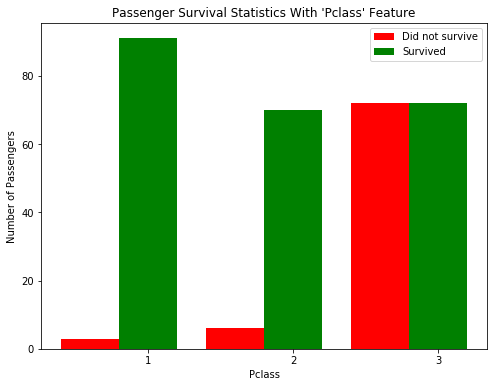

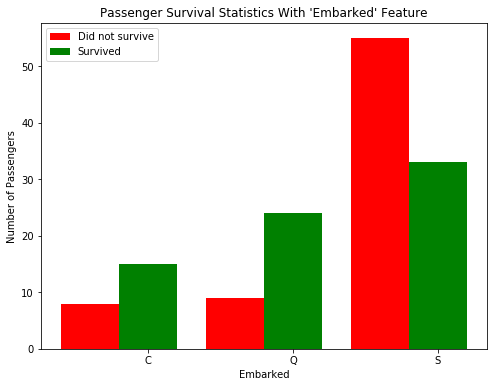

In [68]:
vs.survival_stats(df, survived, 'Pclass', ["Sex == 'female'"])
vs.survival_stats(df, survived, 'Embarked', ["Pclass == 3","Sex == 'female'"])

In [77]:
def predictions_3(df):
    predictions = []
    for _, passenger in df.iterrows():
        if passenger['Sex'] == 'female':
            if passenger['Pclass'] < 3:
                predictions.append(1)
            else:
                if passenger['Embarked'] in ['C', 'Q']:
                    predictions.append(1)
                else:
                    predictions.append(0)
        else:
            if passenger['Age'] < 10:
                 predictions.append(1)
            else:
                 predictions.append(0)
            
    return pd.Series(predictions)
predictions = predictions_3(df)

In [79]:
print(accuracy_score(survived, predictions))

Predictions have an accuracy of 81.82%.
